# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [66]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The Smartcab doesn't move during all simulation(at least until Training Trial 10).
It's rewarded between -6 and 3 points, when the light is red, and the car is stopped(always), it gets a positive reward.
when the light is green with oncoming traffic, the reward is positive as well, and when the light is green with no traffic, the reward is negative.

All rewards based when the driver doesn't take action.

- Higher Rewards: Light should be RED.(Grade A+)
- Good Reward: Light should be GREEN with oncoming traffic.(Grade A/B)
- Negative Reward: Light should be GREEN with no traffic.(Grade B)

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**In agent.py, the flags are defined inside the run class.
One flag that can change simulation is enforce_deadline.

The enforce_deadline is a penalising feature when enabled it does the following, if the agent doesn't reach the goal in time, the trial stops and it's scored as a failed trial, this penalise the reliability score.

In my opinion, when the enforce_deadline is enabled, the reliability score is improved, because the model will learn that this simulation is a time trial.

Another flag is the grid_size, a higher grid means that the agent will need to take more actions to reach our goal.
However i think if we have a small grid_size with many num_dummies, which is the number of agents, it could take longer than a big grid with low number agents.That's because there are lots of rules and rewards(positive and negative).

What i haven't mentioned it's that the model should also experience differents events("Bad" and "Good" Decision), so it can make negative reward actions, and this way improve the decision model.

Environment class function that performs an action is the class act(self, agent, action), which takes as input agent(udacity car) and the action that should be done.

Actions and agent are checked if they are valid or not and the actions from the agent is perfomed, the rewards are calculated and the metrics updated.

In simulator.py, the function render_text() is not the function that control the interface with user,it's the one that display the steps taken in terminal command.It prints if the car has moved, the reward(value) and if it has caused an accident(Grade F).

In the end, it prints the remaining time to reach destination.

Function render() is the GUI, it works together with render_text(), because the information should match. Here the pygame(caused me some trouble to get running) draw the cars, intersections, the road, all boundries from GUI.

And like render_text(), this function(render()) write on the screen the status from the simulation.

In planner.py, the function next_waypoint() collects global location, calculate the true difference based on collect global location step and then first consider the East-West direction and after check the North-South direction.

**That doesn't really explain what the enforce_deadline flag does: the agent should (and will) obey the traffic rules even when there is an enforced deadline to reach.**

**What this flag does is it penalises the agent slightly for taking too much time and also stops each trial when the deadline value reaches zero.**

**One more thing to keep in mind regarding the grid size and the number of dummy agents is that a low traffic density will also make learning harder, as the agent will encounter states where other cars are also present less frequently.**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


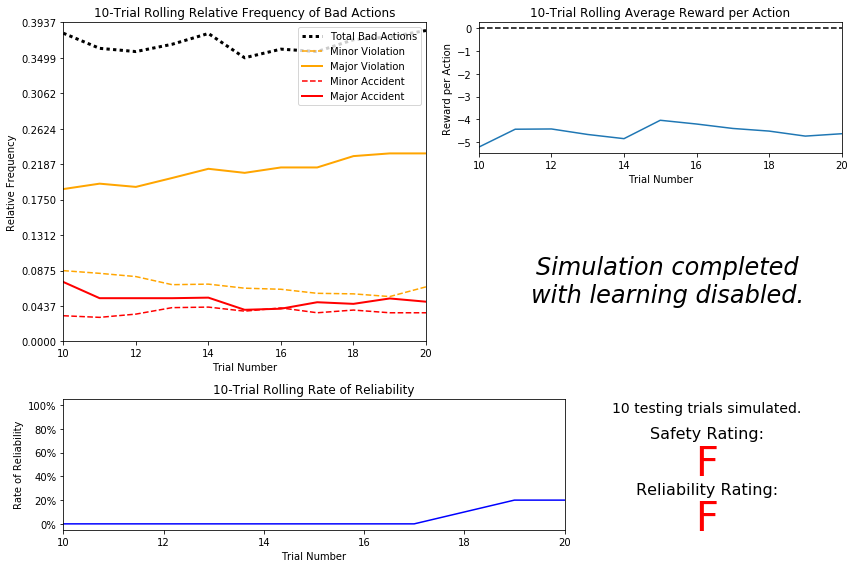

In [67]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**Around 40% of the time, the driving agent is making bad choices.If we check the graphic Trial Number x Relative Frequency, the total bad decisions is between 39.37% and 35% relative frequency.Then we have the violations line and the accidents line.In this simulation the average frequency of Major Violation is higher than Minor Violation and Major/Minor Accidents averages.

- Major Violations(17.50 - 21.87%)
- Minor Violations(4% - 8.75%)
- Major Accidents(4% - 8.75%)
- Minor Accidents(4% - 8.75%)


If we sum the minor and major accident, around 16% from 40% of Bad Actions cause an accident, that is 40% of relative percentage.


The reliability rating is F, which means "Agent fails to reach the destination on time for at least 60% of trips".
Since actions are random, i think this make a lot of sense, since nobody wants to be inside a car that takes random decisions.
If we check the graph Trial Number and Rate of Reliability, the score for reliability just got better after 17 trials,around 20% of reliability rate.

The safety grade is F like reliability, that means "Agent causes at least one major accident, such as driving through a red light with cross-traffic", and checking the right upper corner graph, the average reward per action is -4/-5.

At the first analysis, when the car wouldn't move at all, a heavy penalization would score between -3 and -5.
So yes, it has been heavy penalized.


After 20 trials, the result doesn't change that much, just rate of reliability that increases around 20% and major violations tends to increase too.


A cab, and i wouldn't say smart because there is no logic that drives that cab. That cab it's not safe or realiable, because of the score(F/F) and the rate of bad decisions is too high,around 40%.

I would risk to say that 1% - 2% of bad choice could be consider a "ok" cab. Perhaps we have a tradeoff here, between safety and reliability, because safety is based on violations and accident, and  it might be that we can't reach the destination with the most safe patch.

**It's true that the agent might get unlucky and not reach the destination in time, even if it's optimal.
However, that doesn't mean that it should ever willingly break any traffic rules.
It's better to be late than to get into an accident. Illegal actions are not executed in the simulation (just penalised), and a "bold" smartcab would get banned in real life very quickly.**

**That doesn't really explain what the enforce_deadline flag does: the agent should (and will) obey the traffic rules even when there is an enforced deadline to reach.
What this flag does is it penalises the agent slightly for taking too much time and also stops each trial when the deadline value reaches zero.
Note that there is a hard deadline that is always enforced, at deadline == -100.**

**One more thing to keep in mind regarding the grid size and the number of dummy agents is that a low traffic density will also make learning harder, as the agent will encounter states where other cars are also present less frequently.**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** Features that benefit Safety and Efficiency:

- waypoints
- inputs(light)
- inputs(left)
- inputs(right)
- inputs(oncoming)

Most cases when i think about efficiency, enforced_deadline comes to my head, so the deadline feature, however i don't think it's related to safety, because safety is not directly correlated to efficieny, it can take a really long time to reach my goal by just taking the most safe patch(no accidents or violations).

If we add one more feature, for example deadline, the space state would blow up. The combinations will increase a lot.

From all features, the only one that have a bigger size of valid values is the deadline, waypoint have 3 possible directions, light have 2 possible states, left,right and oncoming have 4 possible values(right, left, None, forward).Deadline is 5 times steps per intersection away from the goal, that's a lot of values and can increase our size of the space state.


Waypoints and inputs(left,right,oncoming) are both related to get to destination as fast as posssible without crashing or make a violation.
Inputs are important because with that information, i can predict which direction others cars can take and then i can make a reasonable choice, this way i improve my safety score(no accident or violation) and choose the best direction to take(efficiency).Waypoints are logically related to efficiency, because you can't sail without a compass, but the correlation with safety is more about taking the right choices, and this way avoiding to spend more time in being exposed.

- Input(left) is superfluous to the model(let's consider that the other cars follow the traffic basics), because it just confirm what others cars will do based on input(right and oncoming) since they want to avoid a crash.

**The reward system is designed so that it encourages the agent to proceed to the destination when possible.
Just like how a human can aim to get somewhere as soon as possible without thinking about a specific deadline, a machine can too.
Additionally, you could mention how including the deadline would blow up the size of the state space.**

**Also, dropping essential features just to decrease the size of the state space is not acceptable (and also unnecessary).
The states should be expressive enough so that the agent can learn to not get into any accidents and also reach the destination fast.**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**State Space:(waypoints, inputs('left'), inputs('right'), inputs('oncoming'))

3(Waypoint) x  4(Inputs('oncoming')) x 4(Inputs('right')) x 2(Inputs('light')) = 96 possible combinations.

The size is 96  for the state space.


I believe that our choice of parameters are crucial for the model,for example our decay function should be chosen so the model can experience the 96 possibles combinations.I don't think 96 is a big space states, i believe the agent have a good amount to trials to achieve a good learning policy for this problem.


**Given that the size of the state space is independent of both the size of the world and the number of dummy agents (assuming there is at least one other car), that's not a valid justification.
Also, an agent that only uses two features is inherently unsafe.
Imagine if a person had very bad eyesight, only enough to see the traffic light but not enough to see nearby traffic.
Naturally, someone like that must not drive (until a sufficiently advanced smart car is created).
Hint: the state space which is usually considered optimal for this problem has 96 states.**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

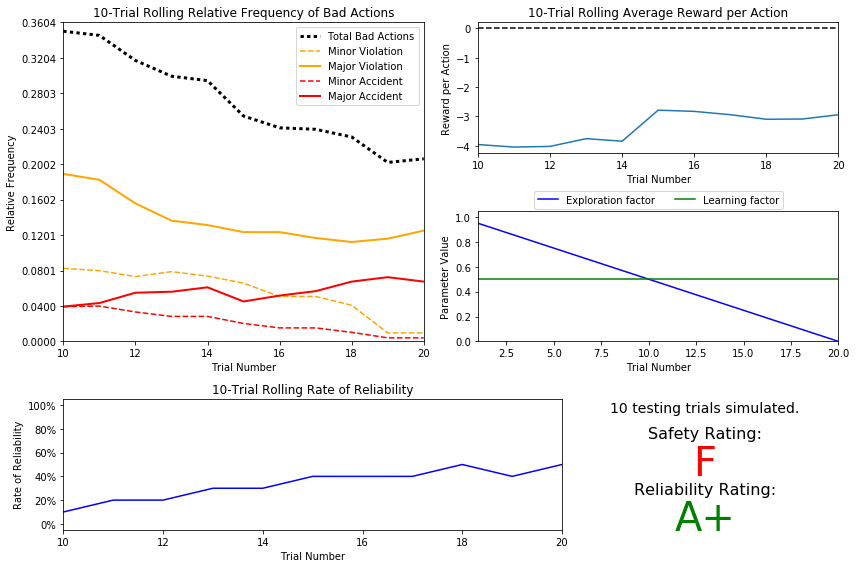

In [68]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** The first thing to notice is that Reliability rating got really high, A+, but the safety rating hasn't change, it's still F.That's a good improvement, because at first our agent would take random actions, that's a really bad choice to perform, and we got score F in Reliability, now our agent can take us to our destination, however it violates some traffic rules.


Since the exploration factor is a linear decaying factor and it's correctly represented in graph that represents exploration and exploitation factor.The agent require 10 trials before testing, that's when the exploration factor intercept the learning factor.


Comparing the no learning file with the standard file, we can say that our bad actions tends to fall, i believe that's a really good sign, because it means that our agent is taking the desired choices, however, the number of major accidents is increasing and that's a bad sign, probably that's why we got a score F for safety.

The reliability rate has been increasing and after 20 trials, the rate is around 60%.


The average reward per actions is also getting better, it tends to increase to a positive average.


Checking the sim_default-learning.txt, at first our agent don't follow the waypoint and usually cross the red light.


Line 47:

('forward', 'red', 'right', None, 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.44
 -- left : 0.00
 
 The agent scores the first correct act in a red light.
 
 Last action:
 
 ('right', 'red', None, 'left', None)
 -- forward : -5.50
 -- right : 1.24
 -- None : 1.49
 -- left : -7.17
 
 The agent have a good score for red light(None: 1.49), so it should stop at red light, but have the right idea, the waypoint and the most probable correct action/direction agree.
 
 I would say that the most difficult here, is to avoid collision between the agent's action and the surrounding agents.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

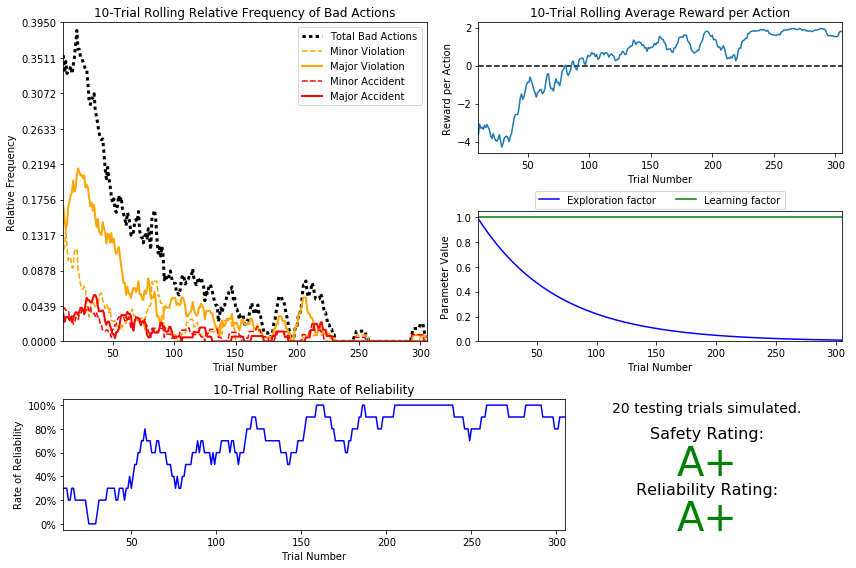

In [69]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 
I've updated my code, and decided to have a space state at 96.
It has been used state = (waypoint, inputs['oncoming'],inputs['right'],inputs['light'])


It was used for epsilon the exponencial equation,


$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}  $$

$$ a =0.985 $$


Around 300 trials were needed to build our policy.


I've choose the alpha and the epsilon based on previous projects posted on Forums
I believe that the higher alpha and epsilon, the faster the algorithm will convert to a policy.
And the other way around is true( lower values means slower training)


It has been a great improvement, safety got A+ and Reliability A+.
Safety has improved a lot.

The policy and the results show that the driving agent sccessfully learned.


I'm really satisfied, after being 5 months away from Udacity.
I've decied to complete this exercise, and with the hit (96 space state) the smartcab problem it's solved.

**'alpha' - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
'epsilon' - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** The optimal policy for the states that were defined,considering that i've just picked 4 states: waypoint and 3 inputs[oncoming, right and light].


The optimal policy is the one that respect the red light, and provided the information around, for example inputs [left] and [oncoming] take the safest and fastest decisions.


**The policy is only determined by which action has the highest Q-value; the other Q-values are irrelevant.
Instead, you should mention things like: "when the light is red, the agent should stay put, except when the destination is to the right and there is no traffic coming from the left proceeding straight".**



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** The characteristic related to the smartcab, in my opinion is the inputs, since the inputs change all the time, the future rewards won't be working for this project.
And related to the enviroment, i think is more related to the space state, depending which features are selected, i.e waypoint, the future reward won't work, because the waypoint always point to the optimal trajectory to be made, however if we don't choose waypoint, and instead get the last choice that was made, then i think future reward would be a good ccharacteristic to be implemented.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.